# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр.1375 Меньшиков Валерий. Вариант №16

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа;
сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

**Выборочное среднее** представляет собой оценку математического ожидания и вычисляется как среднее арифметическое всех значений в выборке:
$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

**Выборочная дисперсия и выборочное СКО** - это оценки дисперсии и стандартного отклонения соответственно и определяются следующим образом:
$$S^2 = \frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$$
$$S = \sqrt{S^2}$$

**Выборочный коэффициент асимметрии** измеряет асимметрию распределения выборки:
$$\widehat{\mathrm{Skew}}X = \frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i - \overline{X}\right)^3}{S^3}$$

**Выборочный коэффициент эксцесса** оценивает степень остроты пика распределения:
$$\widehat{\mathrm{Kurt}}X = \frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i - \overline{X}\right)^4}{S^4} - 3$$

**Метод максимального правдоподобия (ММП)** — это метод оценивания параметров распределения, основанный на максимизации функции правдоподобия:
$$L(\overrightarrow{X},\theta) = \prod_{i=1}^{n}P_{\theta}(X_{i})$$

**Метод моментов** — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

**Статистика критерия Колмагорова:**
$$D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$$

**Теорема Колмагорова:**

$\sqrt{n}D_n \rightarrow K$, при основной гипотезе

**Наиболее мощный критерий:**

$$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > с \\
    p, LR(x) = с \\
    0, LR(x) < с \\
  \end{array}\right.$$

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Пункт №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sp
from scipy.stats import expon
from scipy.stats import kstwobign
from scipy.stats import kstest
from scipy.stats import laplace
from scipy.optimize import minimize

#### Входные данные ####

In [2]:
data = [5,8, 7, 7, 4, 6, 3, 7, 3, 5, 6, 2, 3, 6, 5, 4, 2, 3, 9, 7, 2, 6, 2, 2, 5, 6, 6, 6, 3, 5, 4, 7, 3, 3, 5, 3, 6, 7, 6, 5, 11, 3, 5, 6, 6, 5, 6, 4, 5, 4] #выборка
n = len(data)
print("Выборка: ", data)

Выборка:  [5, 8, 7, 7, 4, 6, 3, 7, 3, 5, 6, 2, 3, 6, 5, 4, 2, 3, 9, 7, 2, 6, 2, 2, 5, 6, 6, 6, 3, 5, 4, 7, 3, 3, 5, 3, 6, 7, 6, 5, 11, 3, 5, 6, 6, 5, 6, 4, 5, 4]


### 1.a Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [3]:
sorted_data = np.sort(data) #сортировка
variation_range = np.unique(sorted_data)
empirical_function = np.cumsum(np.bincount(sorted_data)) / n
print(sorted_data)

[ 2  2  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  8
  9 11]


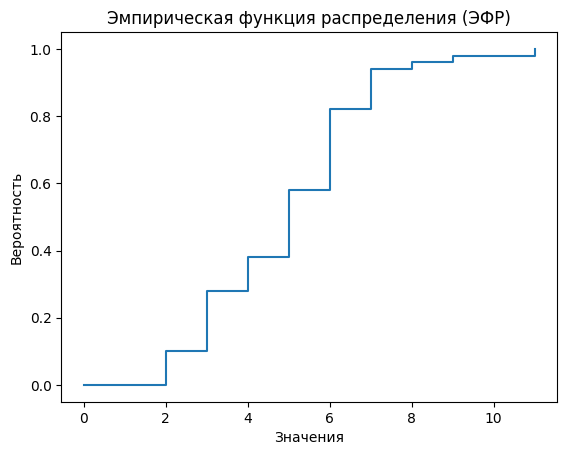

In [4]:
# Построение графика
plt.step(np.arange(len(empirical_function)), empirical_function, where='post')

# Добавление заголовка и меток осей
plt.title('Эмпирическая функция распределения (ЭФР)')
plt.xlabel('Значения')
plt.ylabel('Вероятность')

# Показать график
plt.show()

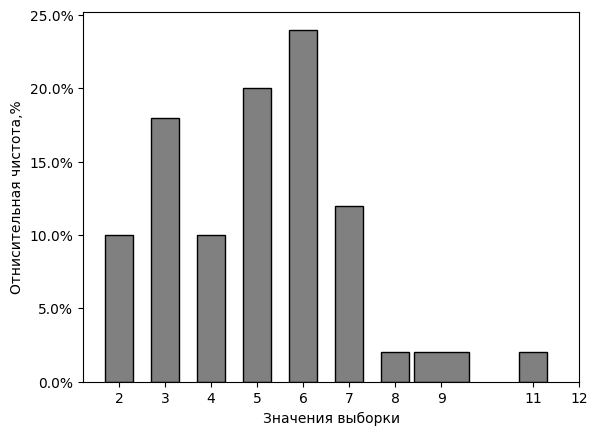

In [5]:
from matplotlib.ticker import PercentFormatter

# Получение уникальных значений и их частот
unique_values, counts = zip(*[(value, data.count(value)) for value in sorted(set(data))])

# Добавление последнего значения в уникальные значения
unique_values = sorted(set(data + [max(unique_values) + 1]))

# Построение гистограммы
plt.hist(data, bins=unique_values, edgecolor='black', align='left', rwidth=0.6, color="gray",  weights=[1/len(data)]*len(data))

# Добавление заголовка и меток осей
plt.xlabel('Значения выборки')
plt.ylabel('Отнисительная чистота,%')

# Установка меток на оси ординат в процентах
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(unique_values)

# Показать гистограмму
plt.show()


### 1.b Вычислить выборочные аналоги следующих числовых характеристик: (i)математическое ожидание, (ii)дисперсия, (iii)медианы, (iv)асимметрии, (v)эксцесса (vi) вероятности $\mathrm{P}(X\in \left[ a,b \right])$

##### Формулы для рассчёта числовых характеристик: 

Выборочное среднее:

$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$

Выборочная дисперсия и выборочное СКО:

$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$

$S=\sqrt{S^2}$

Выборочная медиана:

$np = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}}$

Выборочный коэффициент асимметрии:

$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$

Выборочный коэффициент эксцесса:

$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$




In [6]:

from scipy import stats


a, b = 4.55, 5.89

mean = np.mean(data)
variance = np.var(data)
deviation = np.std(data)
median = np.median(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)
probability = len([x for x in data if a <= x <= b]) / len(data)

print("Мат.ожидание:", mean)
print("Дисперсия:", variance)
print("Выборочное стандартное отклонение:", deviation)
print("Медиана:", median)
print("Асимметрия:", skewness)
print("Эксцесс:", kurtosis)
print("Вероятность попадания в промежуток:", probability)


Мат.ожидание: 4.98
Дисперсия: 3.6595999999999997
Выборочное стандартное отклонение: 1.9130081024397152
Медиана: 5.0
Асимметрия: 0.47416908387379136
Эксцесс: 0.4464207716408408
Вероятность попадания в промежуток: 0.2


### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Рассмотрим оценку максимального правдоподобия (ОМП) для параметра $\lambda$ в распределении Пуассона и вычислим смещение этой оценки. Затем построим оценку метода моментов (ОММ) и определим, что она совпадает с ОМП. Наконец, найдем смещение оценки относительно несмещенной оценки максимального правдоподобия (НРМД).

##### Оценка максимального правдоподобия (ОМП):

Пусть $X_1, X_2, ..., X_n$ - выборка из распределения Пуассона с параметром $\lambda$.

##### Функция правдоподобия:
$$L(\overrightarrow{X};\lambda) = \prod_{i=1}^{n}P_{\lambda}(X_{i}) = \frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}(X_{i}!)} \cdot e^{-n\lambda}$$

##### Прологарифмируем функцию правдоподобия:
$$LL(\overrightarrow{X};\lambda) = \sum_{i=1}^{n}X_{i}\ln(\lambda) - \ln(\prod_{i=1}^{n}X_{i}!) - n\lambda$$

##### Найдем частную производную по параметру $\lambda$ и приравняем производную к нулю:
$$\frac{\partial LL(\overrightarrow{X};\lambda)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda} - n = 0$$

Из этого уравнения получаем:
$$\lambda = \frac{1}{n} \sum_{i=1}^{n}X_{i} = \overline{X}$$

Таким образом, оценка максимального правдоподобия для $\lambda$ равна выборочному среднему => **$\lambda = \overline{X} = 4.98$**.

##### Оценка метода моментов (ОММ):

В данном случае ОММ совпадает с ОМП, так как выборка из распределения Пуассона имеет единственный параметр $\lambda$, и мы используем первый момент ($\overline{X}$) для оценки этого параметра.

##### Смещение оценки относительно НРМД:

Для нахождения НРМД-оценки нам понадобится ОМП, которое мы нашли.

$$g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda)$$

$$h(\overrightarrow{X})=\frac{1}{\prod_{i=1}^{n}X_{i}!}$$

Достаточная минимальная статистика: $T=\sum_{i=1}^{n}X_{i}=249$.

Распределение Пуассона принадлежит экспоненциальному семейству распределения, следовательно, МДС будет являться ПДС.

$\mathbb{E}_{\lambda}\overline{X}=\mathbb{E}_{\lambda}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E_{\lambda}}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E_{\lambda}}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}_{\lambda}X_{1}=\lambda = 4.98$ - НРМД-оценка

### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

Построим асимптотический доверительный интервал (А.Д.И.) уровня значимости $\alpha_1 = 0.10$ для параметра $\lambda$ на основе оценки максимального правдоподобия (ОМП) в распределении Пуассона.

Исходные данные:
- Уровень значимости $\alpha_1 = 0.10$
- Распределение Пуассона: $ q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$
- Оценка параметра $\widehat{\theta} = \widehat{\lambda} = \overline{X}$
- Информация Фишера: $\mathrm{I}(\lambda) = \frac{1}{\lambda}$

**1. Построим на базе ОМП.**

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$

ОМП $\widehat{\theta}=\widehat{\lambda}=\overline{X}$
Для симметричного распределения выберем квантиль нормального распределения для уровня значимости $0.5\alpha_1$:
- $x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha_{1}}{2} = 0.95 \Rightarrow x_{\alpha} = 1.64$

Асимптотический доверительный интервал:
$$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$$

Подставим числовые значения:
$$\left[4.98 - \sqrt{\frac{4.98}{50}} \cdot 1.64 ,  4.98 + \sqrt{\frac{4.98}{50}} \cdot 1.64\right] \ni \lambda$$

Таким образом, асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ составляет $\left[4.46, 5.50\right]$.


**2. Построим на безе асимтотической нормальной оценки $\widehat{\theta}$**


Асимптотическая нормальная оценка:
  $$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$$

Стандартизация:
$$\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$$

Выбор квантилей:
$$X_{\alpha}: \mathrm{Ф}(X_{\alpha})=0.95\to X_{0.95}=1.64$$

Построение интервала:

$$-X_{0.95}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.95}$$

$$\sqrt{n}\frac{\widehat{\lambda} - \lambda}{\sqrt{\widehat{\lambda}}} \in [-X_{0.95}, X_{0.95}]$$

$$\lambda \in \left[ \widehat{\lambda} - \frac{X_{0.95} \cdot \sqrt{\widehat{\lambda}}}{\sqrt{n}}, \widehat{\lambda} + \frac{X_{0.95} \cdot \sqrt{\widehat{\lambda}}}{\sqrt{n}} \right]$$

$$\lambda \in \left[ 4.98 - \frac{1.64 \cdot \sqrt{4.98}}{\sqrt{50}}, 4.98 + \frac{1.64 \cdot \sqrt{4.98}}{\sqrt{50}} \right]$$

Таким образом, асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ составляет $\left[4.46, 5.50\right]$.


In [7]:
from math import sqrt

Ex = 4.98
X_alpha = stats.norm.ppf(0.95)
print("X(alpha) = ", X_alpha) 
l_min = Ex - X_alpha/sqrt(n/Ex)
l_max = Ex + X_alpha/sqrt(n/Ex)
print("AДИ: λ от ", round(l_min, 3), " до ", round(l_max, 3), " с точностью 0,95")

X(alpha) =  1.6448536269514722
AДИ: λ от  4.461  до  5.499  с точностью 0,95


### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 7.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.10$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.



Распишим интервалы:

$I_1 = (-\infty, 3]$

$ I_2 = (3, 4] $

$I_3 = (4, 5] $

$ I_4 = (5, 6]$

$ I_5 = (6, 7] $

$ I_6 = (7, 11] $


Посчитаем теперь для каждого интервала $P_i$:
<br>
$P_{1} = 0.0296$

$P_{2} = 0.0521$

$ P_{3}  = 0.0912$

$ P_{4}  = 0.1277$

$ P_{5}  = 0.149$

$ P_{6}  = 0.149$

$P_{7}  = 0.3479$

Посчитаем теперь для каждого $P_i$ $nP_i$:
$nP_1 =  1.48 $

$ nP_2 = 2.605 $

$ nP_3 = 4.56 $

$ nP_4 = 6.385 $

$ nP_5 = 7.45 $

$ nP_6 = 7.45 $

$ nP_7 = 17.395 $


Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{7}\frac{(n_{i}-np_{i})^{2}}{np_{i}} = 41.13$

$\mathcal{X}^{2}_{k-1,\alpha_{1}}=\mathcal{X}^{2}_{5,0.1}\simeq 10.64$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{5,0.1}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq$ 0.0000007 (В коде выводится, как "x_alpha_1_correct")

In [8]:
lam0=7
I = [(-math.inf, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7,11)]
n_i = [5, 9, 5, 10, 12, 6, 3]
p_i = []
np_i = []
csi = []
for i in I:
    p_i.append(round(sp.poisson.cdf(i[1], lam0) - sp.poisson.cdf(i[0], lam0), 4))
for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
for i in range (len(p_i)):
    np_i.append(round(n*p_i[i], 4))
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])

for i in range(len(n_i)):
    csi.append(round(((n_i[i] - np_i[i]) ** 2) / np_i[i] , 4))
print("χ2 =", sum(csi))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.00000010, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(csi), 7))

P 1 = 0.0296
P 2 = 0.0521
P 3 = 0.0912
P 4 = 0.1277
P 5 = 0.149
P 6 = 0.149
P 7 = 0.3479

nP 1 = 1.48
nP 2 = 2.605
nP 3 = 4.56
nP 4 = 6.385
nP 5 = 7.45
nP 6 = 7.45
nP 7 = 17.395
χ2 = 41.1336
x_alpha_1 равен: 43.33775711444861
x_alpha_1_correct = 7.631568352817197e-07


In [9]:
data = [5, 8, 7, 7, 4, 6, 3, 7, 3, 5, 6, 2, 3, 6, 5, 4, 2, 3, 9, 7, 2, 6, 2, 2, 5, 6, 6, 6, 3, 5, 4, 7, 3, 3, 5, 3, 6, 7, 6, 5, 11, 3, 5, 6, 6, 5, 6, 4, 5, 4]

unique_values = set(data)

for value in unique_values:
    count = data.count(value)
    print(f"Количество {value}: {count}")

Количество 2: 5
Количество 3: 9
Количество 4: 5
Количество 5: 10
Количество 6: 12
Количество 7: 6
Количество 8: 1
Количество 9: 1
Количество 11: 1


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.1$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Минимализируем функцию: $\mathcal{X}^{2}(\theta)=\sum_{i=1}^{7}\frac{(n_{i}-np_{i}(\theta))^{2}}{np_{i}(\theta)}$  

Распишим интервалы:

$I_1 = (-\infty, 3]$

$ I_2 = (3, 4] $

$I_3 = (4, 5] $

$ I_4 = (5, 6]$

$ I_5 = (6, 7] $

$ I_6 = (7, 11] $

Получаем следущие значения $nP_i$:

$nP_1 =  6.315 $

$ nP_2 = 7.075 $

$ nP_3 = 8.81 $

$ nP_4 = 8.775 $

$ nP_5 = 7.28 $

$ nP_6 = 5.18 $

$ nP_7 = 6.3 $
<br><br><br>
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{7}\frac{(n_{i}-np_{i})^{2}}{np_{i}} = 7.54$

$\mathcal{X}^{2}_{k-1,\alpha_{1}}=\mathcal{X}^{2}_{5,0.1}\simeq 10.64$

$\mathcal{X}^{2} < \mathcal{X}^{2}_{5,0.1}\to$ по критерию Пирсона мы не имеем оснований отвергнуть гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq$ 0.38

In [10]:
lam0=4.98
I = [(-math.inf, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7,11)]
n_i = [5, 9, 5, 10, 12, 6, 3]
p_i = []
np_i = []
csi = []
for i in I:
    p_i.append(round(sp.poisson.cdf(i[1], lam0) - sp.poisson.cdf(i[0], lam0), 4))
for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
for i in range (len(p_i)):
    np_i.append(round(n*p_i[i], 4))
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])

for i in range(len(n_i)):
    csi.append(round(((n_i[i] - np_i[i]) ** 2) / np_i[i] , 4))
print("χ2 =", sum(csi))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.10, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(csi), 7))

P 1 = 0.1263
P 2 = 0.1415
P 3 = 0.1762
P 4 = 0.1755
P 5 = 0.1456
P 6 = 0.1036
P 7 = 0.126

nP 1 = 6.315
nP 2 = 7.075
nP 3 = 8.81
nP 4 = 8.775
nP 5 = 7.28
nP 6 = 5.18
nP 7 = 6.3
χ2 = 7.5349
x_alpha_1 равен: 10.644640675668422
x_alpha_1_correct = 0.3753839588008039


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 7.00$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 5.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.1$. Что получится, если поменять местами основную и альтернативную гипотезы?


Основная гипотеза: $H_{0}=\lambda_{0}$

Альтернативная гипотеза: $H_{A}=\lambda_{1}$

Cтатистическое отношение правдоподобия:

$$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \frac{L\left( \overrightarrow{X},\lambda_{1} \right)}{L\left( \overrightarrow{X},\lambda_{0} \right)}= \frac{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})}{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})}$$


$$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot exp({-n\cdot \lambda_{1} + n\cdot \lambda_{0} })$$

$$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) > c\Leftrightarrow \overline{X}> c$$

$$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\sim N(0,1)$$

$$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$$

$$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.9 => X_{a} = 1.28$$


$$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{0}}{\sqrt{\overline{X}}} = X_{a}$$


$$c = X_{a}\frac{\sqrt{\overline{X}}}{\sqrt{n}} + \lambda_{0}$$
$$c = 7.40$$ 

$$с > \overline{X}$$ 
Отвергаем гипотезу
<br><br>
**Поменяем теперь основную и альтернативную гипотезу местами:**

Основная гипотеза: $H_{0}=\lambda_{1}$

Альтернативная гипотеза: $H_{A}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot exp({-n\cdot \lambda_{1} + n\cdot \lambda_{0} })$$

$$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})\gt c\Leftrightarrow \overline{X}\gt c$$

$$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\sim N(0,1)$$

$$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$$

$$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1} = 0.9 => X_{a} = 1.28$$

$$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{1}}{\sqrt{\overline{X}}} = X_{a}$$


$$c = X_{a}\frac{\sqrt{\overline{X}}}{\sqrt{n}} + \lambda_{1}$$
$$c = 5.4$$ 
$$с > \overline{X}$$ 
Отвергаем гипотезу

In [11]:
X_alpha = stats.norm.ppf(0.9)
print(X_alpha)
print("C_0 =", (X_alpha*sqrt(4.98)/sqrt(n)) + 7)
print("C_1 =", (X_alpha*sqrt(4.98)/sqrt(n)) + 5)

1.2815515655446004
C_0 = 7.404450852080845
C_1 = 5.404450852080845


### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$



### h.c Предположив, что изначальные наблюдения представляют собой выборку из геометрического распределения, проведем оценку максимального правдоподобия (ОМП) и метода моментов (ОММ) для параметра $\lambda$. Также определим смещение оценки.

Рассмотрим ОМП.
Плотность вероятности геометрического распределения: $P_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda+1)^{k+1}}$

Построим функцию правдоподобия:

$$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda+1)^{X_{i}}}=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$$

Прологарифмируем функцию правдоподобия:

$$LL(\overrightarrow{X};\theta)= \sum_{i=1}^{n}X_{i}\cdot \ln(\lambda)-(\sum_{i=1}^{n}X_{i}+n)\ln(\lambda+1)$$

Найдем частную производную по параметру $\lambda$, приравняем ее к нулю и, таким образом, определим параметр:

$\frac{\partial LL(\overrightarrow{X};\theta)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda}-\frac{\sum_{i=1}^{50}X_{i}+n}{\lambda+1}=0\to \lambda\cdot \sum_{i=1}^{n}X_{i}+\lambda \cdot n = \lambda\cdot \sum_{i=1}^{n}X_{i}+\sum_{i=1}^{n}X_{i}\to \lambda=\overline{X}\to \widehat{\theta}=\widehat{\lambda}=\overline{X}=4.98$.

**Оценка методом моментов:**

Давайте проведем оценку методом моментов (ОММ). Для геометрического распределения, где $P_{\lambda}(X=k)=\frac{\lambda^{k}}{(\lambda +1)^{k+1}}$, известно, что первый момент $\mathbb{E}X_{1}= \frac{1}{\lambda}$ или $M_{1}=\frac{1}{\overline{X}}$. Учитывая, что у нас одномерный параметр, мы имеем систему из одного уравнения.

Таким образом, получаем оценку $\widetilde{\theta}=\widetilde{\lambda}={\overline{X}}={4.98}$ - ОММ.

Теперь давайте найдем смещение оценки. Для вычисления НРМД-оценки нам потребуется ОМП, который мы уже нашли:

$g\left(T(\overrightarrow{X})\right)=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$

$h(\overrightarrow{X})=1$

Достаточная минимальная статистика: $T=\sum_{i=1}^{n}X_{i}=249$.

$\mathbb{E}_{\lambda}\widehat{\lambda}=\mathbb{E}_{\lambda}\overline{X}=\mathbb{E}_{\lambda}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E_{\lambda}}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E_{\lambda}}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}_{\lambda}X_{1}=\lambda=4.98$

Таким образом, получаем НРМД-оценку $\widehat{\lambda}=4.98$.

### h.d Построить А.Д.И. уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП
Построим на базе ОМП.

Из предыдущего пункта: $\widehat{\lambda} = \overline{X}$

 $$\frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1}$$

 $$ \frac{\partial^2 LL}{\partial \lambda^2} = - \frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} + \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}$$

 $$\mathrm{I}_n(\lambda) = - \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta}\left(\frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} - \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}\right) =  \frac{n}{\lambda} - \frac{n(\lambda - 1)}{(\lambda + 1)^2}$$

 $$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty}\left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \frac{3\lambda + 1}{\lambda(\lambda + 1)^2}$$

 **Квантили.** Так как распределение симметричное:

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.1}{2} = 0.95$

$\mathrm{\Phi}(x_{\alpha}) = 0.95 \Rightarrow x_{\alpha} = 1.64$ из таблицы значений функции Лапласа.


*Асимптотический доверительный интервал:*

$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$$\left[4.85,5.11\right] \ni \lambda$$


In [12]:
x_alpha = 1.64
xs = 4.98
left_2 = xs - x_alpha * (xs / (n*(3*xs+1)))**0.5 #подсчёт левой границы АДИ
right_2 = xs + x_alpha * (xs/ (n*(3*xs+1)))**0.5 #подсчёт правой границы АДИ

print("Асимптотический доверительный интервал от ", round(left_2, 2), " до ", round(right_2, 2))

Асимптотический доверительный интервал от  4.85  до  5.11


### h.e Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Распишим интервалы:

$I_1 = (-\infty, 3]$

$ I_2 = (3, 4] $

$I_3 = (4, 5] $

$ I_4 = (5, 6]$

$ I_5 = (6, 7] $

$ I_6 = (7, 11] $

Получаем следущие значения $nP_i$:

$nP_1 =  6.25 $

$ nP_2 = 4.185 $

$ nP_3 = 3.665 $

$ nP_4 = 3.205 $

$ nP_5 = 2.805 $

$ nP_6 = 2.455 $

$ nP_7 = 7.11 $

$\mathcal{X}^{2}_{набл}= 58.32$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 10.64$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 3 \cdot 10^{-10}$

In [13]:
def geom(x, lambd):
 res_g = 0
 for i in range(0, x + 1):
     res_g += (lambd**i)/((lambd+1)**(i+1))
 return res_g

lam0 = 7
I = [(-math.inf, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7,11)]
n_i = [5, 9, 5, 10, 12, 6, 3]

p_i = []
np_i = []
n_i_np_i = []
res = []
p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
    p_i.append(round(geom(I[i][1], lam0) - geom(I[i][0], lam0), 4))
for i in range(len(p_i)):
    np_i.append(round(p_i[i]*n, 4))
for i in range(len(n_i)):
    n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
    res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))

for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])

print("χ2 =", sum(res))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.1, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(res), 7))


P 1 = 0.125
P 2 = 0.0837
P 3 = 0.0733
P 4 = 0.0641
P 5 = 0.0561
P 6 = 0.0491
P 7 = 0.1422

nP 1 = 6.25
nP 2 = 4.185
nP 3 = 3.665
nP 4 = 3.205
nP 5 = 2.805
nP 6 = 2.455
nP 7 = 7.11
χ2 = 58.318999999999996
x_alpha_1 равен: 10.644640675668422
x_alpha_1_correct = 3.2664659865844214e-10


### h.f)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


Распишим интервалы:

$I_1 = (-\infty, 3]$

$ I_2 = (3, 4] $

$I_3 = (4, 5] $

$ I_4 = (5, 6]$

$ I_5 = (6, 7] $

$ I_6 = (7, 11] $

Получаем следущие значения $nP_i$:

$nP_1 =  8.36 $

$ nP_2 = 4.83 $

$ nP_3 = 4.02 $

$ nP_4 = 3.35 $

$ nP_5 = 2.79 $

$ nP_6 = 2.325 $

$ nP_7 = 6.005 $

$\mathcal{X}^{2}_{набл}= 56.11$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 10.64$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 9 \cdot 10^{-10}$

In [14]:
lam0 = 4.98
I = [(-math.inf, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7,11)]
n_i = [5, 9, 5, 10, 12, 6, 3]

p_i = []
np_i = []
n_i_np_i = []
res = []
p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
    p_i.append(round(geom(I[i][1], lam0) - geom(I[i][0], lam0), 4))
for i in range(len(p_i)):
    np_i.append(round(p_i[i]*n, 4))
for i in range(len(n_i)):
    n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
    res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))

for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])

print("χ2 =", sum(res))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.1, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(res), 7))

P 1 = 0.16722408026755853
P 2 = 0.0966
P 3 = 0.0804
P 4 = 0.067
P 5 = 0.0558
P 6 = 0.0465
P 7 = 0.1201

nP 1 = 8.3612
nP 2 = 4.83
nP 3 = 4.02
nP 4 = 3.35
nP 5 = 2.79
nP 6 = 2.325
nP 7 = 6.005
χ2 = 56.10659999999999
x_alpha_1 равен: 10.644640675668422
x_alpha_1_correct = 8.99484264849093e-10


### Задание-2

In [15]:
data = [3.979, 4.479, 4.138, 4.031, 3.190, 3.671, 4.804, 3.894, 4.130, 3.357, 4.622, 3.459, 4.023, 3.360, 4.648, 4.983, 4.409, 3.726, 3.224, 4.606, 4.085,4.127, 4.290, 3.818, 3.458, 4.936, 4.374, 4.706, 4.896, 4.586, 4.031, 3.687, 3.309, 3.644, 3.590, 3.510, 4.229, 3.925, 3.950, 3.338, 4.141, 3.831,3.015, 4.008, 4.138, 4.233, 3.530, 3.739, 4.422, 3.897] #выборка
n = len(data)
print("Выборка: ", data)

Выборка:  [3.979, 4.479, 4.138, 4.031, 3.19, 3.671, 4.804, 3.894, 4.13, 3.357, 4.622, 3.459, 4.023, 3.36, 4.648, 4.983, 4.409, 3.726, 3.224, 4.606, 4.085, 4.127, 4.29, 3.818, 3.458, 4.936, 4.374, 4.706, 4.896, 4.586, 4.031, 3.687, 3.309, 3.644, 3.59, 3.51, 4.229, 3.925, 3.95, 3.338, 4.141, 3.831, 3.015, 4.008, 4.138, 4.233, 3.53, 3.739, 4.422, 3.897]


### 2.a Построить вариционный ряд, эмпирическую функцию распределения,гистограмму и полигон частот с шагом h.

In [16]:
sorted_data = np.sort(data) #сортировка
variation_range = np.unique(sorted_data)
empirical_function = np.arange(1, n + 1) / n
print(sorted_data)


[3.015 3.19  3.224 3.309 3.338 3.357 3.36  3.458 3.459 3.51  3.53  3.59
 3.644 3.671 3.687 3.726 3.739 3.818 3.831 3.894 3.897 3.925 3.95  3.979
 4.008 4.023 4.031 4.031 4.085 4.127 4.13  4.138 4.138 4.141 4.229 4.233
 4.29  4.374 4.409 4.422 4.479 4.586 4.606 4.622 4.648 4.706 4.804 4.896
 4.936 4.983]


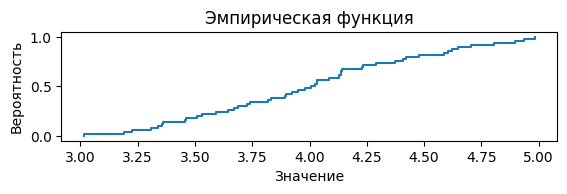

In [17]:
plt.subplot(312)
# Добавим нулевое значение в начало
x = np.concatenate(([sorted_data[0]], sorted_data))
y = np.concatenate(([0], empirical_function))

# Построим эмпирическую функцию
plt.step(x, y, where='post')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция')
plt.show()

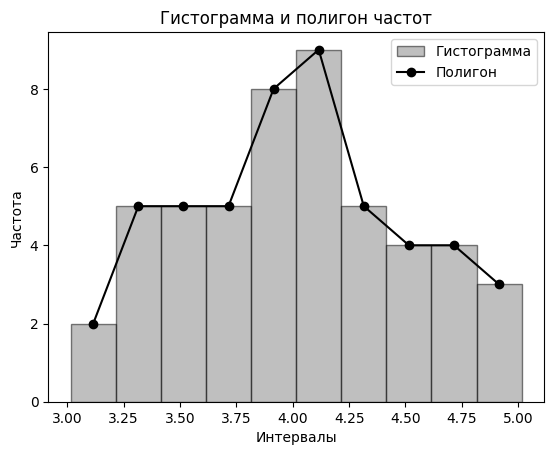

In [18]:
h = 0.20

bins = np.arange(min(data), max(data) + h, h)
plt.hist(data, bins=bins, edgecolor='black', alpha=0.5, color='gray', label='Гистограмма')
plt.title("Гистограмма и полигон частот")
plt.xlabel("Интервалы")
plt.ylabel("Частота")

hist, _ = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist, color='black', marker='o', linestyle='-', label='Полигон')

plt.legend()
plt.show()

### 2.b Вычислить выборочные аналоги следующих числовых характеристик: (i)математическое ожидание, (ii)дисперсия, (iii)медианы, (iv)асимметрии, (v)эксцесса (vi) вероятности $\mathrm{P}(X\in \left[ a,b \right])$



In [19]:
c = 3.60
d = 4.50
Ex = np.mean(data)  # Выборочное математическое ожидание
D = np.var(data)  # Дисперсия
std_deviation = np.std(data)  # СКО (стандартное отклонение)
median_value = np.median(data)  # Медиана
skewness_value = stats.skew(data)  # Асимметрия
kurtosis_value = stats.kurtosis(data)  # Эксцесс
probability_value = len([x for x in data if c <= x <= d]) / len(data)  # Вероятность
print("Мат.ожидание =", Ex)
print("Дисперсия =", D)
print("Стандартное отклонение =", std_deviation)
print("Медиана =", median_value)
print("Асимметрия =", skewness_value)
print("Эксцесс =", kurtosis_value)
print("Вероятность попадания в промежуток =", probability_value)



Мат.ожидание = 4.00352
Дисперсия = 0.24128324959999994
Стандартное отклонение = 0.49120591364518396
Медиана = 4.015499999999999
Асимметрия = 0.11203557292505448
Эксцесс = -0.740656111387413
Вероятность попадания в промежуток = 0.58



### 2.c В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия параметров $(a, \sigma^2)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

Нормальное распределение: $\xi \sim \mathcal{N}(a, \sigma^2) \implies p_{(a, \sigma^2)}(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{\Large (x - a)^2}{\Large 2  \sigma^2}}$ \
$ supp \xi = \mathbb{R}; $ $ E_\theta \xi = a; \ D_\theta \xi = \sigma^2 $ \
\
\
Расчёт ОМП \
$ L(\vec{X}, \theta) = \small \displaystyle \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{\Large (X_i - a)^2}{\Large 2  \sigma^2}} = (2 \pi)^{-\frac{\Large n}{\Large 2}} (\sigma)^{\large -n} e^{- \displaystyle \sum_{i = 1}^{n} \frac{(X_i - a)^2}{2 \sigma^2} }$ \
$ LL(\vec{X}, \theta) = - \frac{n}{2} ln(2 \pi) - n ln \sigma - \displaystyle \sum_{i = 1}^{n} \frac{(X_i - a)^2}{2 \sigma^2}$ \
$ \frac{\large \partial LL(\vec{X}, \theta)}{\large \partial a} = - \displaystyle \sum_{i = 1}^{n} \frac{2(X_i - a)}{2 \sigma^2} (-1) = \displaystyle \sum_{i = 1}^{n} (X_i - a) = \displaystyle \sum_{i = 1}^{n} X_i - na = 0 $ \
$ \hat{a} = \bar{X} = 4.00352 $\
\
$ \frac{\large \partial LL(\vec{X}, \theta)}{\large \partial \sigma} = - \frac{\Large n}{\Large \sigma} + \displaystyle \sum_{i = 1}^{n} \frac{(X_i - a)^2}{ \sigma^3} = 0 $\
$ - \sigma^2 n + \displaystyle \sum_{i = 1}^{n} (X_i - a)^2 = 0 $\
$ \widehat{\sigma^2} = \frac{\displaystyle \sum_{i = 1}^{n} (X_i - a)^2}{\Large n} = \frac{\displaystyle \sum_{i = 1}^{n} (X_i - \bar{X})^2}{\Large n} = S^2 = 0.2412$
\
\
Расчёт ОММ \
$ EX_1 = a; \quad M_1 = \bar{X} $ \
$ EX_1^2 = DX_1 + (EX_1)^2 = \sigma^2 + a^2 ; \quad M_1 = \displaystyle \frac{1}{n}  \sum_{i = 1}^{n} X_i^2 = \bar{X^2} $ \
$\begin{cases} \tilde{a} = \bar{X} \\ a^2 + \sigma^2 = \bar{X^2} \end{cases} \quad \begin{cases} \tilde{a} = \bar{X} \\ (\bar{X})^2 + \sigma^2 = \bar{X^2} \end{cases} \quad \begin{cases} \tilde{a} = \bar{X} = 4.00352 \\ \tilde{\sigma^2} = S^2 = 0.2412 \end{cases} $
\
\
Оценки совпадают. Посчитаем смещещение оценок.\
$ E \hat{a} = E \bar{X} = \frac{1}{n} E \displaystyle \sum_{i=1}^{n}{X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} E {X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} a  = \frac{a n}{n} = a $\
Несмещённая оценка \
\
$ E \hat{\sigma^2} = E S^2 = E \displaystyle \sum_{i = 1}^{n} (X_i - \bar{X})^2 = [ X_i - E_\theta X_i = Y_i ] = $ \
 $[ E_\theta Y_i = 0 \quad D_\theta Y_i = \sigma^2 ]$ \
  $= \frac{1}{n} E_\theta \sum_{i = 1}^{n} (Y_i - \bar{Y}) = \frac{1}{n} E_\theta (\bar{Y} - (\bar{Y})^2) = E \bar{Y^2} - E(\bar{Y})^2 $\
$ \displaystyle E(\bar{Y^2}) = \frac{1}{n} E \sum_{i=1}^{n} Y_i^2  = \frac{1}{n} \sum_{i=1}^{n} EY_i^2 = \sigma^2 $\
$ \displaystyle E(\bar{Y})^2 = \frac{1}{n^2} E( \sum_{i=1}^{n} Y_i )^2 = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{n}EY_i Y_j$\
$ EY_i Y_j = \begin{cases} \sigma^2 \quad i=j \\ 0 \quad i \neq j \end{cases} $\
$ \displaystyle E_\theta S^2 = \sigma^2 - \frac{\sigma^2}{n} = \frac{n - 1}{n} \sigma^2$\
Смещённая оценка\
$ (S')^2 = \frac{n}{n - 1} S^2 $

In [20]:
print("Ex = ", Ex)
print("Ex = ", D)

Ex =  4.00352
Ex =  0.24128324959999994


### 2.d Построить А.Д.И. уровня значимости $\alpha_2$ для параметра для параметров $ (a, \sigma^2) $
Доверительный интервал для параметра $a$.\
По лемме Фишера выберем генератор $ G(\vec{X}, a) = \sqrt{n - 1} \frac{\bar{X} - a}{S} \sim S_{n - 1} $\
$ \mathbb{P}_a \left( \sqrt{n - 1} \frac{\bar{X} - a}{S} \in [-x_\alpha; x_\alpha] \right) = 1 - \alpha_2 $\
$ x_\alpha : S_{n - 1}(x_\alpha) = S_{49}(x_\alpha) = 1 - \frac{\alpha_2}{2} = 0.99  $

In [21]:
import scipy.stats as sps
x_a = sps.t.ppf(0.99, 49)

print("Квантиль x_a =", round(x_a, 3))

left = Ex - x_a*std_deviation/(n-1)**0.5
right = Ex + x_a*std_deviation/(n-1)**0.5
print("Границы: ", left, right)

Квантиль x_a = 2.405
Границы:  3.834763277996911 4.172276722003089


$ \displaystyle a \in \left[  \bar{X} - \frac{x_\alpha S}{\sqrt{n-  1}}; \bar{X} + \frac{x_\alpha S}{\sqrt{n-  1}} \right] = [3.835; 4.172]$

Доверительный интеврал для параметра $\sigma^2$
По лемме Фишера выберем генератор $ \displaystyle G(\vec{X}, \sigma^2) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n - 1}$\
$ \mathbb{P}_{\sigma^2} \left( \frac{nS^2}{\sigma^2} \in [-x_\alpha; x_\alpha] \right) = 1 - \alpha_2 $\
$ x_{1\alpha} : \mathcal{K}_{n - 1}(x_{1\alpha}) = \mathcal{K}_{49}(x_{1\alpha}) = \frac{\alpha_2}{2} = 0.01  $\
$ x_{2\alpha} : \mathcal{K}_{n - 1}(x_{2\alpha}) = \mathcal{K}_{49}(x_{2\alpha}) = 1 - \frac{\alpha_2}{2} = 0.99 $

In [22]:
x_1a = sps.chi2.ppf(0.01, 49)
x_2a = sps.chi2.ppf(0.99, 49)

print("Квантиль x_1a =", round(x_1a, 3), "Квантиль x_2a =", round(x_2a, 3))

left = n*D/(x_2a)
right = n*D/(x_1a)
print("Границы: ", left, right)

Квантиль x_1a = 28.941 Квантиль x_2a = 74.919
Границы:  0.16102839203497685 0.41685878370151636


$ \displaystyle \sigma^2 \in \left[  \frac{n S^2}{x_{2\alpha}}; \frac{n S^2}{x_{1\alpha}} \right] = [0.161; 0.417]$

### 2.e Построение критерия значимости проверки простой гипотезы согласия с нормальным распределением с параметрами $a_0=4.50 \:\sigma_0=0.50$ с использованием теоремы Колмогорова. Проверка гипотезы на уровне значимости $\alpha_2= 0.02$. Вычисление наибольшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.

Основаня гипотеза $ H_0 : X_1...X_n \sim \mathcal{N}(\alpha_0, \sigma_0^2) $\
Альтернативная гипотеза $ H_А : X_1...X_n$ не распределена, как $\mathcal{N}(\alpha_0, \sigma_0^2) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| F_n(x) - Ф_{(\alpha_0, \sigma_0^2)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha_2 = 0.98 $\
\
Найдём $ x_a $  

In [23]:
x_a = sps.ksone.ppf(0.98, 50)
print("При квантиле x_a =", round(x_a, 3))
print("K_50(x) =", round(sps.ksone.cdf(x_a, 50), 3))

При квантиле x_a = 0.194
K_50(x) = 0.98


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.194  \\ 1, \quad \widehat{D_n} > 0.194 \end{cases}$

Найдём $D_n$

In [24]:
print(sorted_data)
def Fn(x):
    arr = sorted_data
    sm = 0
    for pair in arr:
        if pair >= x:
            return sm / 50
        sm += 1
    return sm / 50

x = np.arange(3.015, 4.983, 0.001)
y = [abs(Fn(elem) - sps.norm.cdf(elem, 4.50, 0.5)) for elem in x]


print("Статистика Dn =", round(max(y), 10))




[3.015 3.19  3.224 3.309 3.338 3.357 3.36  3.458 3.459 3.51  3.53  3.59
 3.644 3.671 3.687 3.726 3.739 3.818 3.831 3.894 3.897 3.925 3.95  3.979
 4.008 4.023 4.031 4.031 4.085 4.127 4.13  4.138 4.138 4.141 4.229 4.233
 4.29  4.374 4.409 4.422 4.479 4.586 4.606 4.622 4.648 4.706 4.804 4.896
 4.936 4.983]
Статистика Dn = 0.4430043255


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза отвергается.\
Вычислим наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $ P(\widehat{D_n} \leq x_\alpha) = 0$.\
$ \widehat{D_n} \leq x_\alpha \implies \widehat{D_n} \leq \mathcal{K_{50}^{-1}}(1 - \alpha_2) \implies \mathcal{K_{50}}(\widehat{D_n}) \leq 1 - \alpha_2 \implies \alpha_2 \leq 1 - \mathcal{K_{50}}(\widehat{D_n})$

In [25]:
x_a = 0.443
print("Наибольший уровень значимости a_2 =", 1 - sps.ksone.cdf(x_a, 50))

Наибольший уровень значимости a_2 = 9.263451117291766e-10


### 2.f Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с нормальным распределением с параметрами $a_0=4.5 \:\sigma_0=0.5$. Проверить гипотезу на урокень значимости $\alpha_{2}=0.02$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


In [26]:
I = [(3, 3.25), (3.25,3.5), (3.5,3.75), (3.75, 4), (4, 4.25), (4.25,4.75), (4.75,5)]
a0=4.5
sigma0=0.5
n_i = [3,6,8,7,12,10,4]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in I:
 p_i.append(round(sp.norm.cdf(i[1], loc=a0,scale=sigma0) - sp.norm.cdf(i[0], loc=a0,scale=sigma0), 4))
for i in range (len(p_i)):
 np_i.append(round(n*p_i[i], 4))
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])

print("χ2 =", sum(res))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.02, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(res), 7))

P 1 = 0.0049
P 2 = 0.0165
P 3 = 0.0441
P 4 = 0.0918
P 5 = 0.1499
P 6 = 0.3829
P 7 = 0.1499

nP 1 = 0.245
nP 2 = 0.825
nP 3 = 2.205
nP 4 = 4.59
nP 5 = 7.495
nP 6 = 19.145
nP 7 = 7.495
χ2 = 88.6423
x_alpha_1 равен: 15.033207751218962
x_alpha_1_correct = 2.220446049250313e-16


Распишим интервалы:

$ I_1 = (3, 3.25) $

$ I_2 = (3.25, 3.5) $

$ I_3 = (3.5, 3.75)$

$ I_4 = (3.75, 4) $

$ I_5 = (4, 4.25) $

$ I_6 = (4.25, 4.75)$

$ I_7 = (4.75, 5) $

Получаем следущие значения $nP_i$:

$nP_1 =  0.245 $

$ nP_2 = 0.825 $

$ nP_3 =  2.205 $

$ nP_4 = 4.59 $

$ nP_5 = 7.495 $

$ nP_6 = 19.145 $

$ nP_7 = 7.495 $

$\mathcal{X}^{2}_{набл}= 88.64$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 15.03$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 2.2 \cdot 10^{-16}$

### 2.g Построить критерий значимости $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с нормальным распределением. Проверить гипотезу по уровню значимости$\alpha_{2}=0.02$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [27]:

p_i = []
np_i = []
n_i_np_i = []
res = []
for i in range(len(I)):
 p_i.append(round(1/(2*3.14*(1/Ex)**(0.5))*math.e**(-((float(I[i][1])-Ex)**2)/(2*1/Ex)) +1/(2*3.14*(1/Ex)**(0.5))*math.e**(-((I[i][0]-Ex)**2)/(2*1/Ex)), 4))

for i in range (len(p_i)):
 np_i.append(round(n*p_i[i], 4))

for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))

for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])
print("")
print("χ2 =", sum(res))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.02, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(res), 7))

P 1 = 0.1447
P 2 = 0.294
P 3 = 0.4719
P 4 = 0.5988
P 5 = 0.6007
P 6 = 0.3866
P 7 = 0.1481

nP 1 = 7.235
nP 2 = 14.7
nP 3 = 23.595
nP 4 = 29.94
nP 5 = 30.035
nP 6 = 19.33
nP 7 = 7.405

χ2 = 52.4104
x_alpha_1 равен: 15.033207751218962
x_alpha_1_correct = 4.846094303623261e-09


Распишим интервалы:

$ I_1 = (3, 3.25) $

$ I_2 = (3.25, 3.5) $

$ I_3 = (3.5, 3.75)$

$ I_4 = (3.75, 4) $

$ I_5 = (4, 4.25) $

$ I_6 = (4.25, 4.75)$

$ I_7 = (4.75, 5) $

Получаем следущие значения $nP_i$:


$nP_1 =  7.235 $

$ nP_2 = 14.7 $

$ nP_3 =  23.595 $

$ nP_4 = 29.94$

$ nP_5 = 30.035 $

$ nP_6 = 19.33 $

$ nP_7 = 7.405 $

$\mathcal{X}^{2}_{набл}= 52.41$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 15.03$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 4.85 \cdot 10^{-9}$

### 2.h Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметром $ (a, \sigma^2) = (a_0 = 4.5,\ \sigma^2_0 = 0.5^2) $ при альтернативе нормальности с параметром $ (a, \sigma^2) = (a_1 = 4,\ \sigma^2_1 = 0.5^2) $. Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами основную и альтернативную гипотезы?



Рассмотрим две гипотезы. \
Проверим сложную гипотезу $ H_0 : X_1... X_n \sim \mathcal{N}(a_0, \sigma^2_0)$\
Альтернативную гипотезу $ H_А : X_1... X_n \sim \mathcal{N}(a_1, \sigma^2_1)$\
\
По лемме Неймана-Пирса\
$\varphi \left( \vec{X} \right) = \begin{cases} 0, \quad LR \left( \vec{X}, (a_1, \sigma^2_1), (a_0, \sigma^2_0) \right) < x_\alpha \\ p, \quad LR \left( \vec{X}, (a_1, \sigma^2_1), (a_0, \sigma^2_0) \right) = x_\alpha \\ 1, \quad LR \left( \vec{X}, (a_1, \sigma^2_1),(a_0, \sigma^2_0) \right) > x_\alpha \end{cases}$, где $LR \left( \vec{X}, (a_1, \sigma^2_1), (a_0, \sigma^2_0) \right) = \frac{\large L \left( \vec{X}, (a_1, \sigma^2_1) \right)}{\large L \left( \vec{X}, (a_0, \sigma^2_0) \right)}$

Тогда $\frac{\large L \left( \vec{X}, (a_1, \sigma^2_1) \right)}{\large L \left( \vec{X}, (a_0, \sigma^2_0) \right)} = \displaystyle \left( \frac{\sigma_0}{\sigma_1} \right)^n exp \left( \sum_{i=1}^{n}\frac{X_i^2 - 2a_0X_i + a_0^2}{2 \sigma^2_0} - \sum_{i=1}^{n}\frac{X_i^2 - 2a_1X_i + a_1^2}{2 \sigma^2_1} \right) = $\
Заметим, что $ \sigma_1 = \sigma_0 = \sigma $\
$ = \displaystyle exp \left(  \frac{a_1 - a_0}{\sigma^2} \sum_{i=1}^{n} X_i + \frac{n(a_0^2 - a_1^2)}{2 \sigma^2}  \right) = exp \left( 2 \sum_{i=1}^{n} X_i + 245 \right)$\
$T = \displaystyle \sum_{i = 1}^{n} X_i$ - МДС\
\
Пусть $ LR \left( \vec{X}, \lambda_1, \lambda_0 \right) > x_\alpha $ \
$ \displaystyle exp \left( 2 \sum_{i=1}^{n} X_i + 245 \right) > x_\alpha $\
\
$  \displaystyle \left( 2 \sum_{i=1}^{n} X_i + 245 \right) > lnx_\alpha $\
\
$ \displaystyle \sum_{i=1}^{n} X_i  \  > x_a^* = \left(\frac{ln x_\alpha - 245}{2} \right) $\
\
$ \displaystyle \varphi \left( \vec{X} \right) = \begin{cases} 0, \quad \sum_{i=1}^{n} X_i <  x_\alpha^* \\ p, \quad \sum_{i=1}^{n} X_i =  x_\alpha^* \\ 1, \quad \sum_{i=1}^{n} X_i >  x_\alpha^* \end{cases}$
\
\
Вычислим $ x_\alpha^*$ и $ p $, учитывая, что выборка из нормального распределения. \
$ \displaystyle E_{(a_0, \sigma^2_0)} \varphi(\vec{X}) = \mathbb{P_{(a_0, \sigma^2_0)}} \left( \sum_{i=1}^{n} X_i > x_a^* \right) + p \ \mathbb{P_{(a_0, \sigma^2_0)}} \left( \sum_{i=1}^{n} X_i = x_a^* \right) = \alpha_2$\
$ \displaystyle \mathbb{P_{(a_0, \sigma^2_0)}} \left( \sum_{i=1}^{n} X_i > x_a^* \right) = 1 - \mathbb{P_{(a_0, \sigma^2_0)}} \left( \sum_{i=1}^{n} X_i \leq x_a^* \right) = 1 - Ф_{(na_0, n\sigma^2_0)}(x_\alpha)$\
\
Подбираем $x_\alpha$\
$ 1 - Ф_{(na_0, n\sigma^2_0)}(x_\alpha) < \alpha_2 $. Тогда $\alpha_2 = 250.672.$ \
\
Считаем p\
$ p = \frac{\large \alpha_2 - 1 + Ф_{(na_0, n\sigma^2_0)}(x_\alpha)}{ Ф_{(na_0, n\sigma^2_0)}(x_\alpha) - Ф_{(na_0, n\sigma^2_0)}(x_\alpha - 1)} = 0.00013$




In [28]:
a = 0.02
c = -100
while True:
  if 1 - sps.norm.cdf(c, 50 * 4.5, 50 * 0.25) < a:
    break
  c += 0.001
p = (a - 1 + sps.norm.cdf(c, 50 * 4.5, 50 * 0.25))/(sps.norm.cdf(c, 50 * 4.5, 50 * 0.25) - sps.norm.cdf(c - 1, 50 * 4.5, 50 * 0.25))



In [29]:
print("Полученная константа", round(c, 5))
print("Полученная вероятность", round(p, 5))

Полученная константа 250.672
Полученная вероятность 0.00013


In [30]:
print(Ex)

4.00352


Т.к. $ \sum_{i=1}^{n} X_i = 4.003 < 250.67\implies H_0$ принимаем.

Поменяем гипотезы местами. \
Проверим сложную гипотезу $ H_0 : X_1... X_n \sim \mathcal{N}(a_1, \sigma^2_1)$\
Альтернативную гипотезу $ H_А : X_1... X_n \sim \mathcal{N}(a_0, \sigma^2_0)$\
\
По лемме Неймана-Пирса\
$\varphi \left( \vec{X} \right) = \begin{cases} 0, \quad LR \left( \vec{X}, (a_0, \sigma^2_0), (a_1, \sigma^2_1) \right) < x_\alpha \\ p, \quad LR \left( \vec{X}, a_0, \sigma^2_0), (a_1, \sigma^2_1) \right) = x_\alpha \\ 1, \quad LR \left( \vec{X}, a_0, \sigma^2_0), (a_1, \sigma^2_1) \right) > x_\alpha \end{cases}$, где $LR \left( \vec{X}, (a_0, \sigma^2_0), (a_1, \sigma^2_1) \right) = \frac{\large L \left( \vec{X}, (a_0, \sigma^2_0) \right)}{\large L \left( \vec{X}, (a_1, \sigma^2_1) \right)}$


Тогда $\frac{\large L \left( \vec{X}, (a_0, \sigma^2_0) \right)}{\large L \left( \vec{X}, (a_1, \sigma^2_1) \right)} = \displaystyle \left( \frac{\sigma_1}{\sigma_0} \right)^n exp \left( \sum_{i=1}^{n}\frac{X_i^2 - 2a_1X_i + a_1^2}{2 \sigma^2_1} - \sum_{i=1}^{n}\frac{X_i^2 - 2a_0X_i + a_0^2}{2 \sigma^2_0} \right) = $\
Заметим, что $ \sigma_1 = \sigma_0 = \sigma $\
$ = \displaystyle exp \left(  \frac{a_0 - a_1}{\sigma^2} \sum_{i=1}^{n} X_i + \frac{n(a_1^2 - a_0^2)}{2 \sigma^2}  \right) = exp \left( -2 \sum_{i=1}^{n} X_i - 425 \right)$\
$T = \displaystyle \sum_{i = 1}^{n} X_i$ - МДС\
\
Пусть $ LR \left( \vec{X}, \lambda_1, \lambda_0 \right) > x_\alpha $ \
$ \displaystyle exp \left( -2 \sum_{i=1}^{n} X_i - 425 \right) > x_\alpha $\
\
$  \displaystyle \left( -2 \sum_{i=1}^{n} X_i - 425 \right) > lnx_\alpha $\
\
$ \displaystyle \sum_{i=1}^{n} X_i  \  < x_a^* = -\left(\frac{ln x_\alpha + 425}{2} \right) $\
\
$ \displaystyle \varphi \left( \vec{X} \right) = \begin{cases} 0, \quad \sum_{i=1}^{n} X_i >  x_\alpha^* \\ p, \quad \sum_{i=1}^{n} X_i =  x_\alpha^* \\ 1, \quad \sum_{i=1}^{n} X_i <  x_\alpha^* \end{cases}$
\
\
Вычислим $ x_\alpha^*$ и $ p $, учитывая, что выборка из нормального распределения. \
$ \displaystyle E_{(a_1, \sigma^2_1)} \varphi(\vec{X}) = \mathbb{P_{(a_1, \sigma^2_1)}} \left( \sum_{i=1}^{n} X_i < x_a^* \right) + p \ \mathbb{P_{(a_1, \sigma^2_1)}} \left( \sum_{i=1}^{n} X_i = x_a^* \right) = \alpha_2$\
$ \displaystyle \mathbb{P_{(a_1, \sigma^2_1)}} \left( \sum_{i=1}^{n} X_i \leq x_a^* \right) = Ф_{(na_1, n\sigma^2_1)}(x_\alpha)$\
\
Подбираем $x_\alpha$\
$ Ф_{(na_1, n\sigma^2_1)}(x_\alpha) > \alpha_2 $. Тогда $\alpha_2 = 174.329.$ \
\
Считаем p\
$ p = \frac{\large \alpha_2 - Ф_{(na_0, n\sigma^2_0)}(x_\alpha)}{ Ф_{(na_0, n\sigma^2_0)}(x_\alpha) - Ф_{(na_0, n\sigma^2_0)}(x_\alpha - 1)} = -0.000935$

In [31]:
a = 0.02
c = -100
while True:
  if sps.norm.cdf(c, 50 * 4, 50 * 0.25) > a:
    break
  c += 0.001
p = (a - sps.norm.cdf(c, 50 * 4, 50 * 0.25))/(sps.norm.cdf(c, 50 * 4, 50 * 0.25) - sps.norm.cdf(c - 1, 50 * 4, 50 * 0.25))



In [32]:
print("Полученная константа", round(c, 5))
print("Полученная вероятность", round(p, 6))

Полученная константа 174.329
Полученная вероятность -0.000935


Т.к. $ \sum_{i=1}^{n} X_i = 4.003 < 174.329\implies H_0$ принимаем.

### 2.i В пунктах C-G заменить семейство нормальных распределений на двухпараметрическое семейство распредленией Лапласа с плотностями $p_{a,\sigma}(x)=\cfrac{1}{\sqrt 2\sigma}exp\Biggl(-\cfrac{\sqrt 2}{\sigma}|x-a|\Biggr)$  


### 2.i.c 

$p_{a,\sigma}(x)=\cfrac{1}{\sqrt 2\sigma}exp\Biggl(-\cfrac{\sqrt 2}{\sigma}|x-a|\Biggr)$  
$L(x_1, \cdots, x_{n};\theta) =(\sqrt 2\sigma)^{-n}exp\Biggl(-\cfrac{\sqrt 2}{\sigma}\sum_{i=1}^n|x_{(i)}-a|\Biggr)$  
$L(x_1, \cdots, x_{n};\widehat a,\sigma)=-n \ln(\sqrt 2\sigma)(-\cfrac{\sqrt 2}{\sigma}\sum_{i=1}^n|x_{(i)}-a|)$  
$\cfrac{\delta LL}{\delta\sigma}=-\cfrac{n}{\sigma}+\cfrac{1}{\sigma^2}\sum_{i=1}^n|x_{(i)}-a|=0$  
$\widehat\sigma=\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-a|$  
$L(x_1, \cdots, x_{n};a,\widehat\sigma)=-\cfrac{1}{\sigma}\sum_{i=1}^n sign(x_{(i)}-a)=0$  
$\widehat a=Z_{n,0.5}=4.015 $ 
$\widehat\sigma^2=(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,0.5}|)^2=0.16$  
Оценка методом моментов параметров а и $\sigma^2$:   
Теоретический момент первого порядка распределения: $\mathbb{E}(X_1)=a$   
Эмпирический момент первого порядка: $M_1=\bar{x}=Z_{n,0.5}$  
Теоретический момент второго порядка распределения: $\mathbb{E}(X_2)=\sigma^2$  
Эмпирический момент второго порядка: $M_2=\bar {x^2}-\bar x^2=\cfrac{1}{n^2}\sum_{i=1}^n|x_i-a|^2$  
$\widehat a=Z_{n,0.5}=4.015$    
$\widehat\sigma^2=(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,0.5}|)^2=0.16$     
$T=(\sum_{i=1}^nx_i)$ - МДС и ПДС, так как распределение из семейства Лапласа относится к экспоненциальному семейству.  
$\mathbb{E}_\theta(Z_{n,0.5})=a=4.015$ - НРМД        
$\mathbb{E}_\theta(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,0.5})^2)=\sigma^2$-нрмд   

In [33]:
deviations = [abs(x - median_value)  for x in sorted_data] 
sigma = sum(deviations) / n
print("median =", median_value)
print("sigma^2 =", sigma**2)

median = 4.015499999999999
sigma^2 = 0.15932870559999995


### 2.i.d


Доверительный интервал для параметра $a$.\
По лемме Фишера выберем генератор $ G(\vec{X}, a) = \sqrt{n - 1} \frac{\bar{X} - a}{S} \sim S_{n - 1} $\
$ \mathbb{P}_a \left( \sqrt{n - 1} \frac{\bar{X} - a}{S} \in [-x_\alpha; x_\alpha] \right) = 1 - \alpha_2 $\
$ x_\alpha : S_{n - 1}(x_\alpha) = S_{49}(x_\alpha) = 1 - \frac{\alpha_2}{2} = 0.975  $

In [34]:

x_a = sps.t.ppf(0.99, 49)
print("Квантиль x_a =", round(x_a, 3))

Квантиль x_a = 2.405


In [35]:
left = Ex - x_a*std_deviation/(n-1)**0.5
right = Ex + x_a*std_deviation/(n-1)**0.5
print("Границы: ", left, right)

Границы:  3.834763277996911 4.172276722003089


$ \displaystyle a \in \left[  \bar{X} - \frac{x_\alpha S}{\sqrt{n-  1}}; \bar{X} + \frac{x_\alpha S}{\sqrt{n-  1}} \right] = [3.835; 4.172]$


Доверительный интеврал для параметра $\sigma^2$
По лемме Фишера выберем генератор $ \displaystyle G(\vec{X}, \sigma^2) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n - 1}$\
$ \mathbb{P}_{\sigma^2} \left( \frac{nS^2}{\sigma^2} \in [-x_\alpha; x_\alpha] \right) = 1 - \alpha_2 $\
$ x_{1\alpha} : \mathcal{K}_{n - 1}(x_{1\alpha}) = \mathcal{K}_{49}(x_{1\alpha}) = \frac{\alpha_2}{2} = 0.01  $\
$ x_{2\alpha} : \mathcal{K}_{n - 1}(x_{2\alpha}) = \mathcal{K}_{49}(x_{2\alpha}) = 1 - \frac{\alpha_2}{2} = 0.99 $


In [36]:
x_1a = sps.chi2.ppf(0.01, 49)
x_2a = sps.chi2.ppf(0.99, 49)

print("Квантиль x_1a =", round(x_1a, 3), "Квантиль x_2a =", round(x_2a, 3))


Квантиль x_1a = 28.941 Квантиль x_2a = 74.919


In [37]:
left = n*D/(x_2a)
right = n*D/(x_1a)
print("Границы: ", left, right)

Границы:  0.16102839203497685 0.41685878370151636


$ \displaystyle \sigma^2 \in \left[  \frac{n S^2}{x_{2\alpha}}; \frac{n S^2}{x_{1\alpha}} \right] = [0.161; 0.417]$

### 2.i.e

Основаня гипотеза $ H_0 : X_1...X_n \sim \mathcal{N}(\alpha_0, \sigma_0^2) $\
Альтернативная гипотеза $ H_А : X_1...X_n$ не распределена, как $\mathcal{N}(\alpha_0, \sigma_0^2) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| F_n(x) - F_{(\alpha_0, \ \sigma_0)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha_2 = 0.95 $\
\
Найдём $ x_a $  


In [38]:
fx = 0.98
x_a = sps.ksone.ppf(fx, 50)


print("При квантиле x_a =", round(x_a, 3))
print("K_50(x) =", round(sps.ksone.cdf(x_a, 50), 3))

При квантиле x_a = 0.194
K_50(x) = 0.98


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.194  \\ 1, \quad \widehat{D_n} > 0.194\end{cases}$

Найдём $D_n$

In [39]:
print(sorted_data)
def Fn(x):
    arr = sorted_data
    sm = 0
    for pair in arr:
        if pair >= x:
            return sm / 50
        sm += 1
    return sm / 50

x = np.arange(3.015, 4.983, 0.001)
y = [abs(Fn(elem) - sps.laplace.cdf(elem, 4.50, 2 ** 0.5 / 0.5)) for elem in x]


print("Статистика Dn =", round(max(y), 10))




[3.015 3.19  3.224 3.309 3.338 3.357 3.36  3.458 3.459 3.51  3.53  3.59
 3.644 3.671 3.687 3.726 3.739 3.818 3.831 3.894 3.897 3.925 3.95  3.979
 4.008 4.023 4.031 4.031 4.085 4.127 4.13  4.138 4.138 4.141 4.229 4.233
 4.29  4.374 4.409 4.422 4.479 4.586 4.606 4.622 4.648 4.706 4.804 4.896
 4.936 4.983]
Статистика Dn = 0.4084205329


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.\
Вычислим наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $ P(\widehat{D_n} \leq x_\alpha) = 0$.\
$ \widehat{D_n} \leq x_\alpha \implies \widehat{D_n} \leq \mathcal{K_{50}^{-1}}(1 - \alpha_2) \implies \mathcal{K_{50}}(\widehat{D_n}) \leq 1 - \alpha_2 \implies \alpha_2 \leq 1 - \mathcal{K_{50}}(\widehat{D_n})$

In [40]:
x_a = 0.408
print("Наибольший уровень значимости a_2 =", 1 - sps.ksone.cdf(x_a, 50))

Наибольший уровень значимости a_2 = 2.4412418198060948e-08


### 2.i.f

Распишим интервалы:

$ I_1 = (3, 3.25) $

$ I_2 = (3.25, 3.5) $

$ I_3 = (3.5, 3.75)$

$ I_4 = (3.75, 4) $

$ I_5 = (4, 4.25) $

$ I_6 = (4.25, 4.75)$

$ I_7 = (4.75, 5) $

Получаем следущие значения $nP_i$:

$nP_1 =  17.5545 $

$ nP_2 = 1.6225 $

$ nP_3 =  1.772$

$ nP_4 =  1.936 $

$ nP_5 = 4.2295$

$ nP_6 = 1.936 $

$ nP_7 = 20.949 $


$\mathcal{X}^{2}_{набл}= 120.59$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 15.03$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 0 \cdot $

In [41]:
def CuclSum(a, g2):
  arr = [ 3.5, 3.75, 4, 4.25, 4.75, 5]
  res = [0] * (len(arr) + 1)

  #Вычисление p_j0
  res[0] = sps.laplace.cdf(3.5, a, 2 ** 0.5 / g2)
  for i in range(1, len(arr)):
    res[i] = sps.laplace.cdf(arr[i], a, 2 ** 0.5 / g2) - sps.laplace.cdf(arr[i - 1], a, 2 ** 0.5 / g2)
  res[len(arr)] = 1 - sps.laplace.cdf(5, a, 2 ** 0.5 / g2)
  res = [round(elem, 5) for elem in res]
  print("p_i0 =", res)
  for i in range(len(res)):
    print("n*P",i, " =", n*res[i])

  #Вычисление X^2
  v = [3,6,8,7,12,10,4]
  ans = [(v[i] - 50 * res[i]) ** 2 / (50 * res[i]) for i in range(len(v))]
  ans = [round(elem, 3) for elem in ans]


  return sum(ans)

print("X^2 =", round(CuclSum(4.5, 0.5), 3))

p_i0 = [0.35109, 0.03245, 0.03544, 0.03872, 0.08459, 0.03872, 0.41898]
n*P 0  = 17.5545
n*P 1  = 1.6225
n*P 2  = 1.772
n*P 3  = 1.936
n*P 4  = 4.2295
n*P 5  = 1.936
n*P 6  = 20.949
X^2 = 120.59


### 2.i.g 

Распишим интервалы:

$ I_1 = (3, 3.25) $

$ I_2 = (3.25, 3.5) $

$ I_3 = (3.5, 3.75)$

$ I_4 = (3.75, 4) $

$ I_5 = (4, 4.25) $

$ I_6 = (4.25, 4.75)$

$ I_7 = (4.75, 5) $

Получаем следущие значения $nP_i$:


$nP_1 =  8.25 $

$ nP_2 = 6.045 $

$ nP_3 =  4.22$

$ nP_4 = 2.86$

$ nP_5 = 1.895 $

$ nP_6 = 0.795 $

$ nP_7 = 0.52 $

$\mathcal{X}^{2}_{набл}= 196.4748$

$\mathcal{X}^{2}_{N-1,\alpha_{1}}=\mathcal{X}^{2}_{3,0.02}\simeq 15.03$

$\mathcal{X}^{2}\gt \mathcal{X}^{2}_{3,0.02}\to$ по критерию Пирсона мы отвергаем гипотезу

Наибольшее значение уровня значимости, при котором нет еще оснований отвергнуть данную гипотезу $\simeq 0$

In [42]:
I = [(3, 3.25), (3.25,3.5), (3.5,3.75), (3.75, 4), (4, 4.25), (4.25,4.75), (4.75,5)]
n_i = [3,6,8,7,12,10,4]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in range(len(n_i)):
 p_i.append(round(1/((2*3.14*0.63)**(0.5))*math.e**(-((2**(0.5))*abs(I[i][1]-2.835))/((0.63)**(0.5)) -1/((2*3.14*0.63)**(0.5))*math.e**(-((2**(0.5))*abs(I[i][0]-2.835))/((0.63)**(0.5)))), 4))

for i in range (len(n_i)):
 np_i.append(round(n*p_i[i], 4))

for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
 
for i in range(len(p_i)):
    print("P",i+1,"=", p_i[i])
print("")
for i in range(len(p_i)):
    print("nP",i+1,"=", np_i[i])
print("")
print("χ2 =", sum(res))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.02, df = 7-1))
print("x_alpha_1_correct =", 1 - sp.chi2.cdf(sum(res), 7))

P 1 = 0.165
P 2 = 0.1209
P 3 = 0.0844
P 4 = 0.0572
P 5 = 0.0379
P 6 = 0.0159
P 7 = 0.0104

nP 1 = 8.25
nP 2 = 6.045
nP 3 = 4.22
nP 4 = 2.86
nP 5 = 1.895
nP 6 = 0.795
nP 7 = 0.52

χ2 = 196.4748
x_alpha_1 равен: 15.033207751218962
x_alpha_1_correct = 0.0


## Выводы

В процессе выполнения данной лабораторной работы мы изучили применение выборочных числовых характеристик. Освоили принципы работы с оценкой максимального правдоподобия (ОМП) и оценкой метода моментов (ОММ). Провели построение доверительных интервалов, используя генераторы по лемме Фишера, а также реализовали асимптотические доверительные интервалы, основанные на асимптотической нормальности оценок и информации Фишера.

Изучили применение критерия Колмогорова для проверки гипотезы о совпадении эмпирической и теоретической функций распределения, а также рассмотрели критерии Хи-квадрат для проверки гипотез о распределении данных. Освоили принципы построения наиболее мощного критерия для простых гипотез на основе статистики отношения правдоподобия.